<a href="https://colab.research.google.com/github/SankethHanasi/BIS_LAB/blob/main/Ant_Colony_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of cities: 6
Enter the coordinates of each city (x, y):
City 1 (x, y): 0 0
City 2 (x, y): 2 4
City 3 (x, y): 5 2
City 4 (x, y): 6 7
City 5 (x, y): 8 3
City 6 (x, y): 3 6
Enter the number of ants: 10
Enter the value for alpha (pheromone importance): 1.0
Enter the value for beta (heuristic importance): 2.0
Enter the pheromone evaporation rate (rho): 0.1
Enter the pheromone deposit constant (Q): 1.0
Enter the maximum number of iterations: 100
Best solution (city order): [0, 2, 4, 3, 5, 1, 0]
Best cost: 22.89006001497021


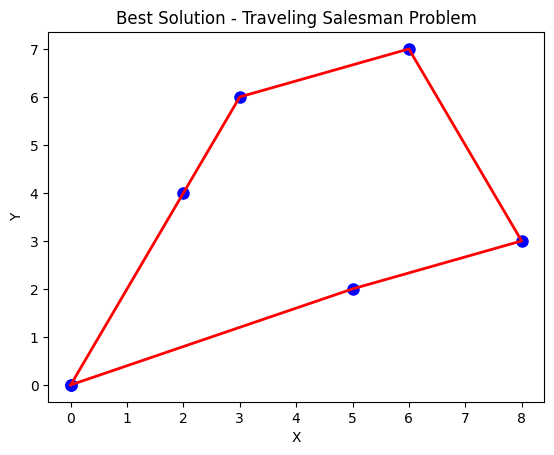

In [4]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

# City class to store city coordinates and calculate distance
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance_to(self, other):
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Ant Colony Optimization class for solving TSP
class ACO_TSP:
    def __init__(self, cities, num_ants, alpha, beta, rho, Q, max_iter):
        self.cities = cities
        self.num_ants = num_ants
        self.alpha = alpha  # importance of pheromone
        self.beta = beta  # importance of heuristic information (distance)
        self.rho = rho  # pheromone evaporation rate
        self.Q = Q  # pheromone deposit constant
        self.max_iter = max_iter  # number of iterations

        self.num_cities = len(cities)
        self.pheromone = np.ones((self.num_cities, self.num_cities))  # initial pheromone matrix
        self.heuristic = np.zeros((self.num_cities, self.num_cities))  # heuristic information (1/distance)

        # Precompute heuristic values (inverse of the distance)
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    self.heuristic[i, j] = 1 / cities[i].distance_to(cities[j])

    def construct_solution(self):
        solution = []
        visited = [False] * self.num_cities
        current_city = random.randint(0, self.num_cities - 1)
        solution.append(current_city)
        visited[current_city] = True

        for _ in range(self.num_cities - 1):
            next_city = self.select_next_city(current_city, visited)
            solution.append(next_city)
            visited[next_city] = True
            current_city = next_city

        # Return to the origin city
        solution.append(solution[0])
        return solution

    def select_next_city(self, current_city, visited):
        probabilities = []
        for i in range(self.num_cities):
            if not visited[i]:
                pheromone = self.pheromone[current_city, i] ** self.alpha
                heuristic = self.heuristic[current_city, i] ** self.beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        # Normalize the probabilities
        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]

        # Choose the next city based on the probabilities
        next_city = np.random.choice(range(self.num_cities), p=probabilities)
        return next_city

    def update_pheromones(self, all_solutions, all_costs):
        # Evaporation of pheromones
        self.pheromone = (1 - self.rho) * self.pheromone

        # Deposit new pheromones based on solutions found by ants
        for i in range(self.num_ants):
            for j in range(self.num_cities - 1):
                from_city = all_solutions[i][j]
                to_city = all_solutions[i][j + 1]
                self.pheromone[from_city, to_city] += self.Q / all_costs[i]
                self.pheromone[to_city, from_city] += self.Q / all_costs[i]

    def run(self):
        best_solution = None
        best_cost = float('inf')

        for _ in range(self.max_iter):
            all_solutions = []
            all_costs = []

            # Construct solutions for all ants
            for _ in range(self.num_ants):
                solution = self.construct_solution()
                cost = self.calculate_cost(solution)
                all_solutions.append(solution)
                all_costs.append(cost)

                # Keep track of the best solution
                if cost < best_cost:
                    best_solution = solution
                    best_cost = cost

            # Update pheromones based on the solutions found
            self.update_pheromones(all_solutions, all_costs)

        return best_solution, best_cost

    def calculate_cost(self, solution):
        cost = 0
        for i in range(len(solution) - 1):
            cost += self.cities[solution[i]].distance_to(self.cities[solution[i + 1]])
        return cost

# Function to plot the best solution
def plot_solution(cities, solution):
    # Extract the x and y coordinates of the cities in the solution
    x = [cities[i].x for i in solution]
    y = [cities[i].y for i in solution]

    # Plot the cities as points ('o') with default color
    plt.plot(x, y, 'o', markersize=8, color='blue')  # Cities marked as blue dots

    # Plot the best path (the solution) with a different color (e.g., red) and lines
    plt.plot(x, y, '-', color='red', linewidth=2)  # Best path as a red line

    # Label the axes
    plt.xlabel('X')
    plt.ylabel('Y')

    # Set the title of the plot
    plt.title('Best Solution - Traveling Salesman Problem')

    # Show the plot
    plt.show()

# Main part where user can input cities
if __name__ == "__main__":
    # Get user input for the cities
    num_cities = int(input("Enter the number of cities: "))
    cities = []

    print("Enter the coordinates of each city (x, y):")
    for i in range(num_cities):
        x, y = map(float, input(f"City {i+1} (x, y): ").split())
        cities.append(City(x, y))

    # Get input for ACO parameters
    num_ants = int(input("Enter the number of ants: "))
    alpha = float(input("Enter the value for alpha (pheromone importance): "))
    beta = float(input("Enter the value for beta (heuristic importance): "))
    rho = float(input("Enter the pheromone evaporation rate (rho): "))
    Q = float(input("Enter the pheromone deposit constant (Q): "))
    max_iter = int(input("Enter the maximum number of iterations: "))

    # Initialize ACO parameters and run the algorithm
    aco = ACO_TSP(cities=cities, num_ants=num_ants, alpha=alpha, beta=beta, rho=rho, Q=Q, max_iter=max_iter)

    # Run the ACO algorithm to solve the TSP
    best_solution, best_cost = aco.run()

    # Output the best solution and plot it
    print(f"Best solution (city order): {best_solution}")
    print(f"Best cost: {best_cost}")
    plot_solution(cities, best_solution)

